In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.price.median()

106.0

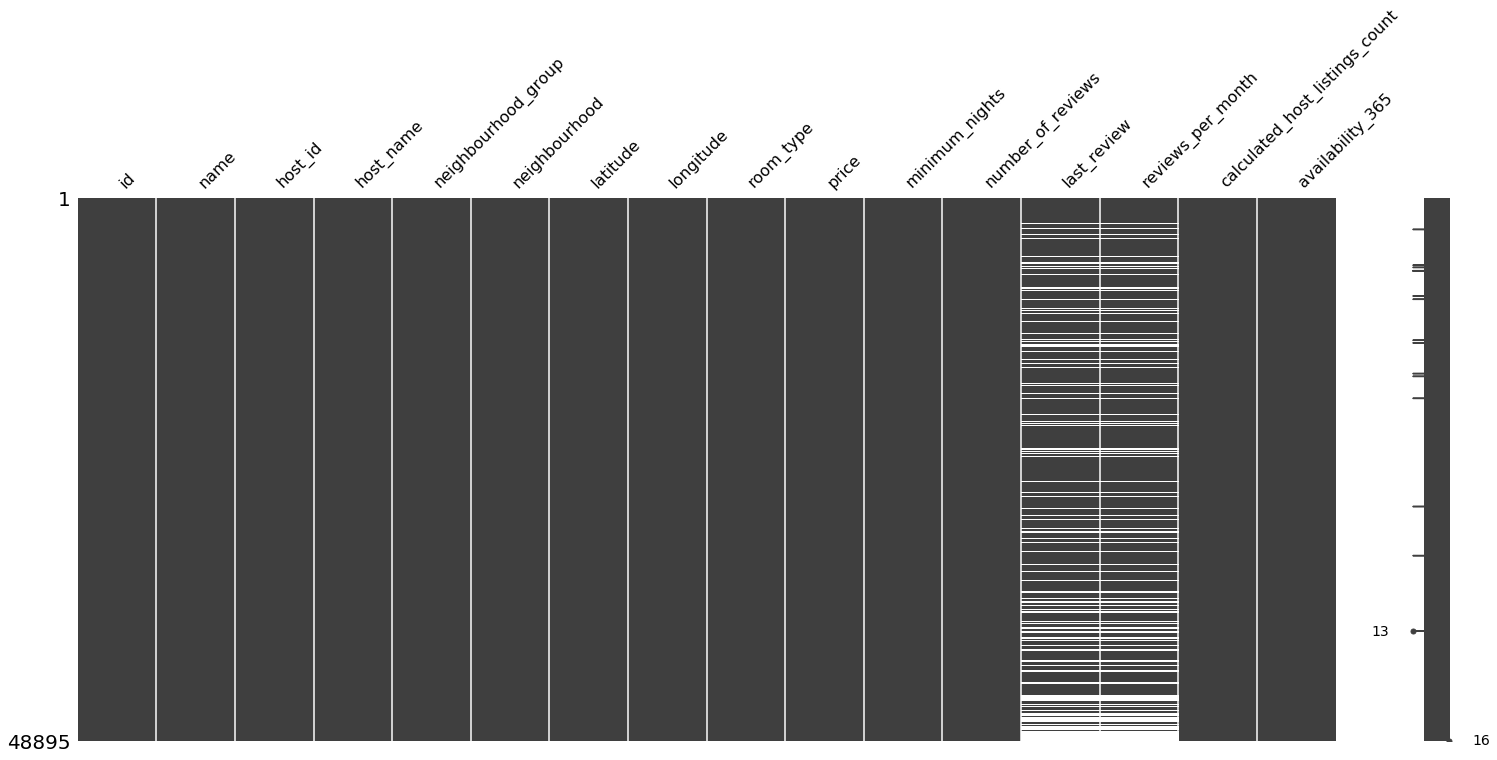

In [7]:
msno.matrix(df)

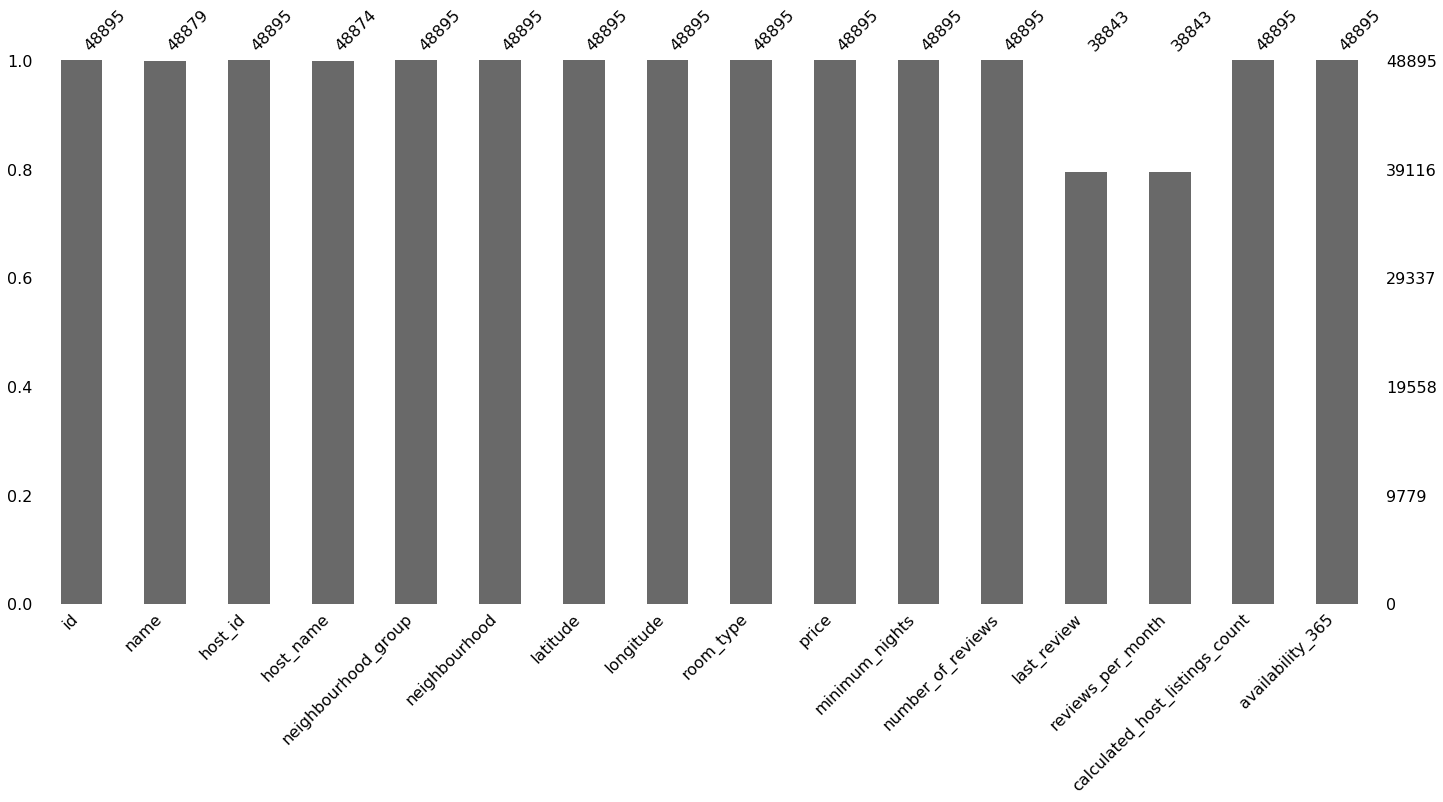

In [8]:
msno.bar(df)

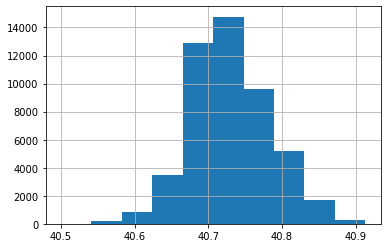

In [9]:
df.latitude.hist()

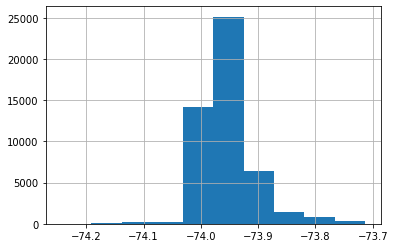

In [10]:
df.longitude.hist()

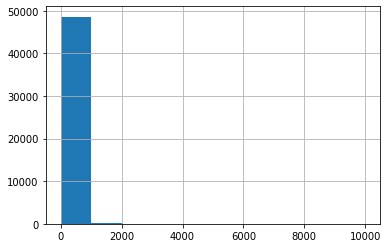

In [11]:
df.price.hist()
#Existen departamentos con costo 'cero' por lo que propondría o imputarles un valor o eliminarlos, son 11 registros con ese valor

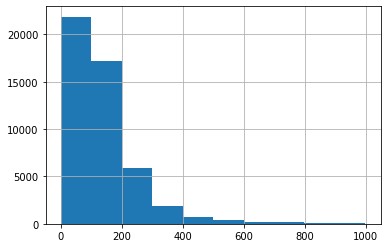

In [12]:
#Un 'zoom' en la variable del precio
dfg = df['price'] < 1000
df_price = df[dfg]
df_price.price.hist()

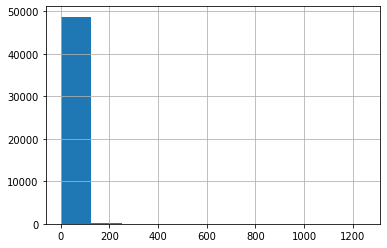

In [13]:
df.minimum_nights.hist()

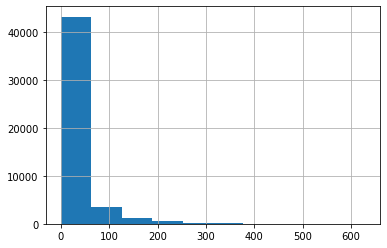

In [14]:
df.number_of_reviews.hist()

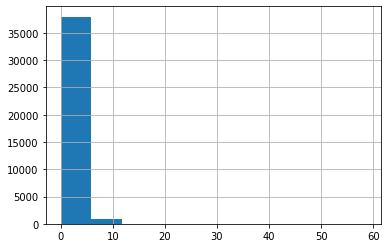

In [15]:
df.reviews_per_month.hist()

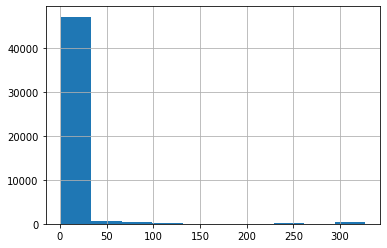

In [16]:
df.calculated_host_listings_count.hist()

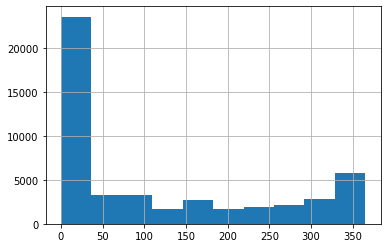

In [17]:
df.availability_365.hist()

In [18]:
df.columns.values.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [19]:
#Variables importantes a mi criterio
Cathegorical = ['neighbourhood_group', 'neighbourhood', 'room_type',]
Numeric = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 
           'calculated_host_listings_count', 'availability_365']

In [20]:
df_cath = df[Cathegorical]
df_num = df[Numeric]

In [21]:
df_num.corr()
#No hay nada de correlación jajaja
# Sólo un poco entre número de vistas y número de vistas por mes, con lo que se podría inferir que vale la pena conservar ambas variables

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


i=0
j=1
cc=0 
MAXIMO=0 #Es la maxima similitud entre vectores
v1=0 #Es el vector que se comparar con todos los demas
v2=0 #Es el vector comparado con V1
while i < (len(matrix)): #matrix es la matriz de todos los vectores a comparar
  #print(i)
  while j < (len(matrix)):  
    RES = dot(matrix[i],matrix[j]) / (norm(matrix[i])*norm(matrix[j]))
    if RES > MAXIMO:
      MAXIMO=RES
      v1=i
      v2=j
    #print("Texto ",v1," vs Texto ",v2," similitud = ",MAXIMO)
    #Dist_euc=distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(matrix[i], matrix[j])]))
    #print("Euclidean distance from ",i," to ",j,":",distance)
    #print (i,j, RES)
    #print(bin_cos[i,j])
    #print(i);print(J)
    cc += 1  
    j += 1
  i += 1
  j = i+1 
print("Texto ",v1," vs Texto ",v2," similitud = ",MAXIMO)

In [142]:
Numeric2 = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
           'availability_365', 'price']
df_2 = df[Numeric2]
df_2.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,40.64749,-73.97237,1,9,6,365,149
1,40.75362,-73.98377,1,45,2,355,225
2,40.80902,-73.94190,3,0,1,365,150
3,40.68514,-73.95976,1,270,1,194,89
4,40.79851,-73.94399,10,9,1,0,80


In [150]:
X = df_2.iloc[:, [0,1,2,3,4,5]].values
y = df_2.iloc[:, 6].values

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [152]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
#classifier.fit(X_train, y_train)

In [154]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0) 
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.06429973821989529
